# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import plotly.express as px
from sklearn.utils import resample

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [ ]:
df = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [ ]:
df.describe(include='all')

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,565,NaN,NaN,NaN,NaN,NaN,NaN
mean,53.288300,1.345400,164.308200,NaN,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,NaN,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,NaN,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# verificação de valores vaziu ou nulo
total_nulos = df.isnull().sum().sum()
total_vazios = (df == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 0
Total de campos vazios: 0


Com verificação do isnull e df = ' ' não apresenta nenhum valor faltante.

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


In [ ]:
fig = px.histogram(df, x='cardio_disease', color='active', barmode='group')

# Layout
fig.update_layout(title='Relação entre doença cardio e atividade fisica',
                  xaxis_title='cardio',
                  yaxis_title='Contagem',
                  legend_title='active')
fig.show()

In [ ]:
fig = px.histogram(df, x='cardio_disease', color='gender', barmode='group')

# Layout
fig.update_layout(title='Relação entre cardio e genero',
                  xaxis_title='cardio',
                  yaxis_title='Contagem',
                  legend_title='gender')
fig.show()

In [ ]:
fig = px.box(df, x='cardio_disease', y='height', color='cardio_disease')

fig.update_layout(
    title='Distribuição da altura por condição cardíaca',
    xaxis_title='cardio',
    yaxis_title='Altura'
)

fig.show()


In [ ]:
# Mapeando valores
df['cardio_disease'] = df['cardio_disease'].map({0: 'Não', 1: 'Sim'})

# Boxplot
fig = px.box(
    df,
    x='cardio_disease',
    y='weight',
    points='all'
)

fig.update_layout(
    title='Distribuição do peso por condição cardíaca',
    xaxis_title='Condição cardíaca',
    yaxis_title='Peso (kg)',
)

fig.update_traces(boxmean=True)  # exibe média

fig.show()



# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



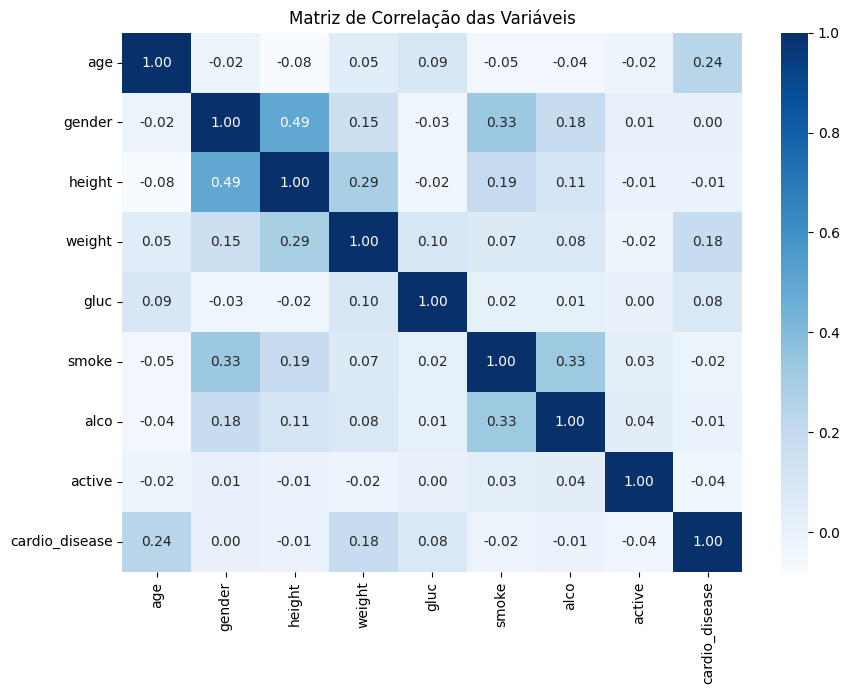

In [ ]:

# Ajuste da coluna weight
df['weight'] = (
    df['weight']
    .astype(str)                      # garante que todos os valores são strings
    .str.replace(',', '.', regex=False)  # troca vírgula por ponto
)

# converte para float
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Ajuste da coluna cardio_disease para formato numérico (0/1)
if df['cardio_disease'].dtype == 'object':
    df['cardio_disease'] = df['cardio_disease'].map({'Não': 0, 'Sim': 1})

cols = [
    'age',             # idade
    'gender',          # gênero
    'height',          # altura
    'weight',          # peso
    'gluc',            # glicose
    'smoke',           # fumante
    'alco',            # álcool
    'active',          # atividade física
    'cardio_disease'   # variável target
]

df_corr = df[cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [ ]:
# Separação de treino e teste
X = df.drop('cardio_disease', axis=1)
y = df['cardio_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

O StandardScaler deixa todas as variáveis na mesma escala:
média = 0 e desvio padrão = 1

Assim evita que variaveis grandes dominen o modelo

In [ ]:
train_df = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)

major_class = train_df[train_df.cardio_disease == train_df.cardio_disease.mode()[0]]
minor_class = train_df[train_df.cardio_disease != train_df.cardio_disease.mode()[0]]

minor_up = resample(
    minor_class,
    replace=True,
    n_samples=len(major_class),
    random_state=42
)

balanced_df = pd.concat([major_class, minor_up]).sample(frac=1, random_state=42)

X_train_bal = balanced_df.drop('cardio_disease', axis=1)
y_train_bal = balanced_df['cardio_disease']

In [ ]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

print(X_train_scaled.head())
print(X_test_scaled.head())

print(X_train_bal.head())
print(y_train_bal.head())

print(y_train.value_counts())
print(y_train_bal.value_counts())

      age  gender  height  weight  cholesterol  gluc  smoke  alco  active
1171   49       2     165    59.0            1     1      0     0       0
2475   48       2     165    66.0            1     1      0     0       1
8307   46       1     153    56.0            1     1      0     0       1
1113   60       1     144    62.0            1     1      0     0       1
6545   63       1     169    56.0            1     1      0     0       1
      age  gender  height  weight  cholesterol  gluc  smoke  alco  active
593    52       1     156    73.0            1     1      0     0       1
7134   50       1     178    85.0            2     1      0     0       0
7590   58       1     160    70.0            1     1      0     0       1
2224   59       1     155    61.0            1     1      0     0       1
3609   48       1     153    60.0            1     1      0     0       1
1171    1
2475    0
8307    0
1113    0
6545    1
Name: cardio_disease, dtype: int64
593     0
7134    1
7590   

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [ ]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000)

In [ ]:
intercepto = modelo.intercept_
coeficientes = pd.DataFrame({
    'Variável': X_train_bal.columns,
    'Coeficiente': modelo.coef_[0]
})

print(intercepto)
print(coeficientes)

[0.012392]
      Variável  Coeficiente
0          age     0.418975
1       gender    -0.004135
2       height    -0.061221
3       weight     0.363016
4  cholesterol     0.427330
5         gluc    -0.064132
6        smoke    -0.003518
7         alco    -0.006358
8       active    -0.063570


In [ ]:
y_pred = modelo.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Matriz de confusão:\n", matriz)
print("Relatório de Classificação:\n", relatorio)

Acurácia: 0.6416
Precisão: 0.6576655052264808
Recall: 0.6001589825119237
F1 Score: 0.6275976724854531
Matriz de confusão:
 [[849 393]
 [503 755]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65      1242
           1       0.66      0.60      0.63      1258

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.64      2500
weighted avg       0.64      0.64      0.64      2500



O modelo faz boas previsões se apresentar valores satisfatórios de acurácia, recall e F1-score, além de uma matriz de confusão equilibrada. Caso uma ou mais métricas críticas estejam baixas (principalmente recall), o modelo deve ser ajustado ou melhorado.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [ ]:
y_pred = modelo.predict(X_test_scaled)
y_prob = modelo.predict_proba(X_test_scaled)[:, 1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Acurácia: 0.6416
Precisão: 0.6576655052264808
Recall: 0.6001589825119237
F1 Score: 0.6275976724854531


Acurácia: mostra quantas previsões o modelo acertou no geral.

Precisão: dos classificados como doentes, quantos realmente eram doentes.

Recall: dos pacientes realmente doentes, quantos foram detectados.

F1-score: equilíbrio entre precisão e recall.


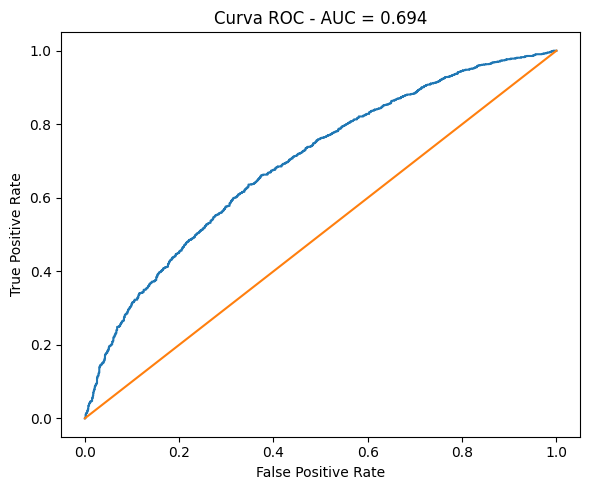

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC - AUC = {roc_auc:.3f}")
plt.tight_layout()
plt.show()

A curva ROC compara:

TPR (sensibilidade) vs. FPR (falsos positivos)

1.0 -> modelo perfeito

0.5 -> modelo aleatório

0.69 -> qualidade moderada(que foi atingido)

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A) É um modelo que estima a probabilidade de um evento ocorrer usando a função sigmoide, transformando entradas lineares em valores entre 0 e 1.

B) Porque sua saída é uma probabilidade que é convertida em classes (0 ou 1), ou seja, o objetivo final é classificar.

C) Ambas combinam variáveis por meio de uma equação linear e usam otimização para ajustar pesos, compartilhando estrutura matemática inicial.